In [5]:
import pandas as pd 
rf_df = pd.read_csv('../data/submissions/if_sells_submission.csv')
linreg_df = pd.read_csv('../data/submissions/if_sells_submission_linreg.csv')
rf_df.head()

,ID,item_cnt_month
0,0,20.00000
1,5100,0.00000
2,10200,0.00000
3,15300,0.00000
4,20400,9.07163


In [7]:
rf_df['item_cnt_month'].value_counts().head()

0.000000     187759
9.071630      12200
20.000000      6617
1.332013       1482
3.899994        895
Name: item_cnt_month, dtype: int64

In [8]:
linreg_df['item_cnt_month'].value_counts().head()

0.000000     187775
20.000000        88
1.768896          3
1.486564          2
2.574037          2
Name: item_cnt_month, dtype: int64

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(linreg_df['item_cnt_month'], rf_df['item_cnt_month'])

13.181265878650283

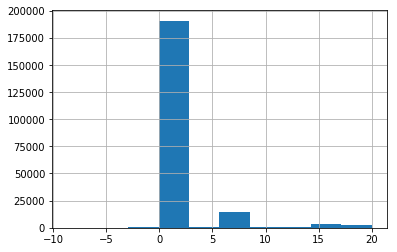

In [12]:
stats_df = rf_df 
stats_df['linreg_item_cnt_month'] = linreg_df['item_cnt_month']
stats_df['diff'] = stats_df['item_cnt_month'] - stats_df['linreg_item_cnt_month']
stats_df['diff'].hist()
plt.show()

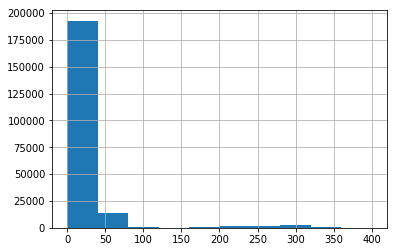

In [13]:
stats_df['diff_squared'] = stats_df['diff'] * stats_df['diff']
stats_df['diff_squared'].hist()
plt.show()

In [15]:
stats_df['diff_squared'].mean()

13.181265878650283

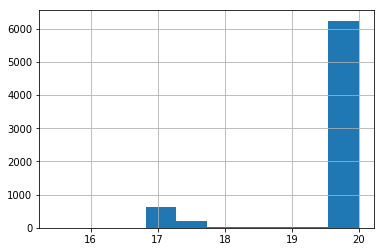

In [17]:
stats_df[stats_df['diff'] > 12]['item_cnt_month'].hist()
plt.show()

In [18]:
stats_df['item_cnt_month'].value_counts()

0.000000     187759
9.071630      12200
20.000000      6617
1.332013       1482
3.899994        895
9.120046        568
9.099101        514
11.009619       332
9.084916        293
17.133546       271
9.542421        220
4.339348        214
17.161017       150
1.380429        119
17.604337        99
3.270001         82
9.439352         72
17.169953        69
17.146832        66
9.142006         60
10.734726        59
4.184039         58
10.987924        56
4.032410         53
9.449075         50
4.095829         47
4.623393         46
4.535183         39
17.631808        33
9.569892         29
              ...  
9.348024          1
4.594806          1
4.055875          1
3.931284          1
19.576262         1
11.955878         1
14.632039         1
19.555491         1
11.225882         1
3.746024          1
1.721694          1
10.197213         1
3.077490          1
9.410093          1
11.603507         1
7.549137          1
4.569369          1
7.503569          1
4.173335          1


In [20]:

df_valid = pd.read_hdf('../data/processed/validation/valid.hdf')
df_valid.head()

,ID,shop_id,item_id,year,month
0,0,5,5037,2015,10
1,1,5,5320,2015,10
2,2,5,5233,2015,10
3,3,5,5232,2015,10
4,4,5,5268,2015,10


In [21]:
df_valid['shop_id'].nunique()

42

In [22]:
df_valid['item_id'].nunique()

5100

In [23]:
df_valid.groupby('shop_id')['item_id'].nunique().value_counts()

5100    42
Name: item_id, dtype: int64